In [3]:
!pip install scikit-fuzzy
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import numpy as np

In [387]:
def cmeans_(data, init, m):

  # "Fuzzy Partition"
  u_old = init.T.copy()
  # Normalization.
  u_old = u_old/np.sum(u_old, axis=0)
  u_old = np.fmax(u_old, np.finfo(np.float64).eps)

  # Cluster centers.
  um = u_old ** m
  # (um.T.dot(d0).T / um.sum(axis=0)).T
  centers = um.dot(data) / um.sum(axis=1).reshape(-1,1)

  # Distance (assuming "euclidean")
  d = cdist(data, centers).T
  # Make sure that there is no "0".
  d = np.fmax(d, np.finfo(np.float64).eps)

  # Objective function
  jm = (um*d**2).sum()
  exponent = -2./(m - 1)

  # # Update "Fuzzy Partition". The following method
  # # is implemented in "fuzz.cluster.cmeans".
  # u = d/np.max(d, axis=0)
  # u = np.fmax(u, np.finfo(u.dtype).eps)
  # u = (u/np.min(u, axis=0))**exponent
  # # Normalization.
  # u = u/np.sum(u, axis=0, keepdims=1)

  # Update "Fuzzy Partition"
  clusters = range(init.shape[1])
  u = np.array([1/((d.T/d.T[:,[c]])**exponent).sum(axis=1) 
                for c in clusters])

  return centers, u.T, jm, d

def fuzzy_cmeans(data, init, m, maxiter=10, error=0.0005):

  # Initialize loop parameters
  Jm, cntr = [], []
  u, p = init.copy(), 0

  while p < maxiter - 1:
    u2 = u.copy()
    centers, u, e, _ = cmeans_(data, u, m)
    cntr.append(centers.ravel())
    Jm.append(e)
    p += 1
    if np.linalg.norm(u - u2) < error:
      break
  
  # Plot cluster 
  plt.scatter(data[:,0], data[:,1], c='grey', alpha=0.4)
  cntr = np.array(cntr)

  for n in range(init.shape[1]):

    plt.plot(cntr[:,n*2], cntr[:,n*2+1], 
             label='Cluster {}'.format(n+1),
             lw=1, ls='--', marker='s', ms=5)
    
  plt.title('Number of iterations : {:,}\n'
            'Error : {:,.4g} ⟶ {:,.4g}'
            .format(p,obj_fnc[0],obj_fnc[-1]))
  
  return centers, u, Jm

def c_plot(d0, c0):

  plt.scatter(d0[:,0], d0[:,1], c='grey',alpha=0.4)
  plt.scatter(c0[:,0], c0[:,1], s=500, fc='white', ls='-', 
              ec='r', alpha=0.4, lw=2)

  for n,xy in enumerate(c0):
    plt.annotate('{}'.format(n+1),xy, va='center', ha='center', 
                 c='r', fontsize=12)

  plt.title('Cluster-centers')

def gen_prob(X, n_cluster, seed=None):

  np.random.seed(seed)
  init = np.random.rand(X.shape[0], n_cluster)
  return init/init.sum(axis=1).reshape(-1,1)

In [388]:
from sklearn.datasets import make_blobs
n_centers = 4
X, y = make_blobs(n_samples=100, centers=n_centers, n_features=2, 
                  random_state=100, cluster_std=0.8)

<font size=5>**Fuzzy c-Means Algorithm**</font>

To describe a method to determine the fuzzy $c$-partition matrix $U$ for grouping a collection of $n$ data sets into $c$ classes, we define an objective function $J_{m}$ for a fuzzy $c$-partition:

> $J_{m}(U,v) = \sum_{k=1}^{n}\sum_{i=1}^{c}(\mu_{ik})^{m'}(d_{ik})^2$

where

> $d_{ik} = d(x_{k} - v_{i}) = [\sum_{j=1}^{m}(x_{kj}-v_{ij})^2]^\frac{1}{2}$

and where $\mu_{ik}$ is the membership of the $k$th data point in the $i$th class. $j$ is a variable on the feature space, that is, $j$ = 1, 2, . . .,$m$. The distance measure, $d_{ik}$ is a Euclidean distance between the $i$th cluster center and the $k$th data set. A new parameter is introduced called a **weighting parameter**, $m$ **(Bezdek, 1981)**. This value has a range $m = [1,\inf)$ This parameter controls the amount of fuzziness in the classification process. Also, $v_{i}$ is the $i$th cluster center, which is described by $m$ features and can be arranged in vector form as before, $v_{i} = \{v_{i1}, v_{i2}, . . . , v_{im}\}$.

Each of the cluster coordinates for each class can be calculated in a manner similar to the calculation in the crisp case:

> $v_{ij} = \left(\frac{\sum_{k=1}^{n}\mu_{ik}^{m'}\cdot x_{ki}}{\sum_{k=1}^{n}\mu_{ik}^{m'}}\right)$

An effective algorithm for fuzzy classification, called iterative optimization, was proposed by **Bezdek (1981)**. The steps in this algorithm are as follows:

1. Fix $c (2 ≤ c < n)$ and select a value for parameter $m$. Initialize the partition matrix, $U^{(0)}$. Each step in this algorithm will be labeled $r$, where $r$ = 0, 1, 2, . . .
2. Calculate the $c$ centers $\{v^{(r)}_{i}\}$ for each step.
3. Update the partition matrix for the rth step, $U^{(r)}$, as follows:

> $\mu_{ik}^{(r+1)}=\left[\sum_{j=1}^{c}\left(\frac{d_{ik}^{(r)}}{d_{jk}^{(r)}}\right)^{2/(m'-1)}\right]^{-1}$ , for $I_{k} = \emptyset$ , where $\sum_{i\in I_{k}}\mu_{ik}^{(r+1)}=1$

4. If $\Vert U^{(r+1)}-U^{(r)}\Vert \leq \epsilon_{L}$, stop; otherwise set $r = r + 1$ and return to step 2.

**Function**: fuzz.cluster.cmeans

In [ ]:
print(fuzz.cluster.cmeans.__doc__)

Initialize parameters for "fuzzy c-means"

In [393]:
fuzzifier = 2
maxiter = 100

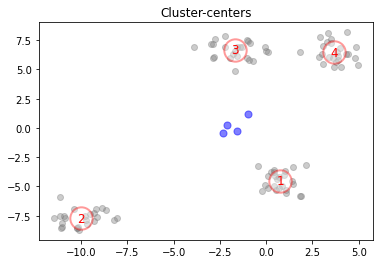

In [394]:
init = gen_prob(X, n_centers)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, c=n_centers, m=fuzzifier, 
                                                 error=0.005, maxiter=maxiter, init=init.T)
c_plot(X, cntr)

# Find cluster.
um = init**fuzzifier
c0 = (um.T.dot(X).T / um.sum(axis=0)).T
plt.scatter(c0[:,0], c0[:,1], marker='o', lw=1, s=50, alpha=0.5, c='b')
plt.show()

In [396]:
np.round(u,3).T[:10,:]

array([[0.017, 0.007, 0.819, 0.157],
       [0.01 , 0.003, 0.035, 0.952],
       [0.011, 0.003, 0.033, 0.953],
       [0.006, 0.99 , 0.003, 0.002],
       [0.003, 0.995, 0.001, 0.001],
       [0.013, 0.007, 0.944, 0.037],
       [0.001, 0.   , 0.994, 0.005],
       [0.975, 0.009, 0.008, 0.008],
       [0.005, 0.991, 0.002, 0.002],
       [0.985, 0.006, 0.005, 0.005]])

Fuzzy C-Means

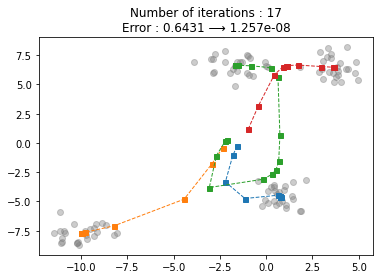

In [395]:
centers, u1, obj_fnc = fuzzy_cmeans(X, init, fuzzifier, maxiter)

In [397]:
np.round(u1[:10,:], 2)

array([[0.02, 0.01, 0.82, 0.16],
       [0.01, 0.  , 0.03, 0.95],
       [0.01, 0.  , 0.03, 0.95],
       [0.01, 0.99, 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  ],
       [0.01, 0.01, 0.94, 0.04],
       [0.  , 0.  , 0.99, 0.  ],
       [0.98, 0.01, 0.01, 0.01],
       [0.01, 0.99, 0.  , 0.  ],
       [0.98, 0.01, 0.  , 0.  ]])

**Function**: sklearn.cluster.KMeans

In [277]:
kmeans = KMeans(n_clusters=4, init=c0, n_init=1, max_iter=300)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True,
       init=array([[-1.66169194,  0.23352546],
       [-2.06548213,  0.11261099],
       [-1.59142366,  0.316623  ],
       [-1.93695136,  0.57981889]]),
       max_iter=300, n_clusters=4, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

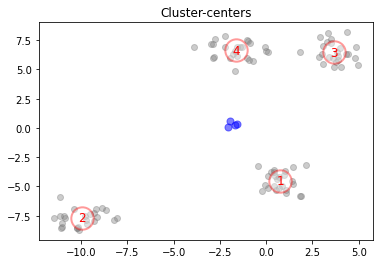

In [278]:
c_plot(X, kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker='o', lw=1, s=50, alpha=0.5, c='b')

In [275]:
def _kmeans0(X, centers):

  # Calculate distance from each centroid.
  d = cdist(X, centers)
  c = np.argmin(d, axis=1)

  new_cntr, ssw = [], []
  for n in range(centers.shape[0]):

    if sum(c==n)>0:
      # Update cluster variables.
      x = X[c==n,:].mean(axis=0, keepdims=True)
      new_cntr.append(x[0])
      # Sum of squared error within cluster ("SSW")
      ssw.append(cdist(X[c==n,:], x).sum())
    else:
      new_cntr.append(centers[n,:])
      ssw.append(0)

  return np.array(new_cntr), sum(ssw), c

def _kmeans(X, centers, max_iter=2, tol=0.0001):

  # Initialize loop parameters
  u, ssw, p = centers.copy(), [], 0
  cntr = [centers.ravel()]

  while p < max_iter:
    u2 = u.copy()
    u, error, labels = _kmeans0(X, u)
    cntr.append(u.ravel())
    ssw.append(error)
    p += 1
    if np.linalg.norm(u - u2) < tol:
      break

  # Plot cluster 
  plt.scatter(X[:,0], X[:,1], c='grey', alpha=0.4)
  cntr =  np.array(cntr)

  for n in range(centers.shape[0]):
    
    plt.plot(cntr[:,n*2], cntr[:,n*2+1], 
             label='Cluster {}'.format(n+1),
             lw=1, ls='--', marker='s', ms=5)
    
  plt.title('Number of iterations : {:,}\n'
            'SSW : {:,.4g} ⟶ {:,.4g}'
            .format(p, ssw[0], ssw[-1]))
  
  return u, ssw, labels

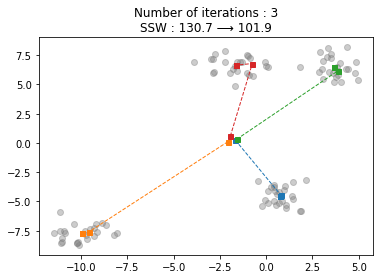

In [279]:
a = _kmeans(X, centers, max_iter=100)